In [173]:
### from __future__ import print_function
import pandas as pd
import numpy as np
import os
import pickle
import os.path
from datetime import datetime
import pyarrow
import matplotlib.pyplot as plt
%matplotlib inline
font = {'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

#set ggplot style
plt.style.use('ggplot')

In [177]:
# Dynamic parameters
data_dir  = './data/' + str(datetime.date(datetime.now()))
agg_file  = 'agg_data_{}.parquet.gzip'.format(datetime.date(datetime.now()))
trend_file  = 'trend_{}.csv'.format(datetime.date(datetime.now()))
report  = 'report_{}.xlsx'.format(datetime.date(datetime.now()))

COUNTRY = 'Uk'


print(trend_file)

# import data
agg_df = pd.read_parquet(os.path.join(data_dir, agg_file))
daily_df = pd.read_csv(os.path.join(data_dir, trend_file))

# daily_df.new_confirmed_cases = daily_df.new_confirmed_cases.abs()

#Create place to save diagrams
image_dir = './images/'
if not os.path.exists(image_dir):
    os.mkdir(image_dir)

trend_2020-03-11.csv


In [178]:
# Convert types
for col in ['confirmed', 'deaths', 'recovered']:
    agg_df[col] = agg_df[col].replace('', 0).astype(int)

# Trend Lines

In [181]:
def create_title(fig_title, country):
    if country:
        return fig_title + ' for ' + country
    else:
        return fig_title
    
def create_save_file(col, country, graph_type):
    if country:
        return '{}_{}_{}.png'.format(country, col, graph_type)
    else:
        return '{}_{}.png'.format(col, graph_type)

In [182]:
# Plot and save trendline graph
def create_trend_line(tmp_df, col, col2, col3, fig_title, country):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp_df.groupby(['date'])[[col, col2, col3]].sum().plot(ax=ax, marker='o')
    ax.set_title(create_title(fig_title, country))
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'trendline')))

# Plot and save trendline graph
# def MA_trend_line(tmp_df, col, col2, fig_title, country):
#     fig, ax = plt.subplots(figsize=(20,10))
#     tmp_df.groupby(['date'])[[col, col2]].sum().plot(ax=ax)
#     ax.set_title(create_title(fig_title, country))
#     fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))    

# # Plot and save trendline graph
# def exp_MA_trend_line(tmp_df, col, col2, country):
#     fig, ax = plt.subplots(figsize=(20,10))
#     tmp_df.groupby(['date'])[[col, col2]].sum().plot(ax=ax)
#     if country:
#         ax.set_title(country)
#     fig = ax.get_figure()
#     fig.savefig(os.path.join(image_dir, '{}_trendline.jpg'.format(col)))    
    
def create_bar(tmp_df, col, rgb, country):
    fig, ax = plt.subplots(figsize=(20,10))
    tmp = tmp_df.head(30).groupby(['date'])[[col]].sum()
    ax.set_title(create_title(col, country))
    tmp.plot.bar(ax=ax, rot=45, color=rgb)
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col, country, 'bar')))
    
    
def create_stacked_bar(tmp_df, col1, col2, fig_title, country):
    tmp_df = tmp_df.set_index('date')
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title(create_title(fig_title, country))
    tmp_df[[col2, col1]].plot.bar(ax=ax,
                                  rot=45,
                                  stacked=True);
    fig = ax.get_figure()
    fig.savefig(os.path.join(image_dir, create_save_file(col2, country, 'stacked_bar')))

Creating graphs...
... Time Series Trend Line


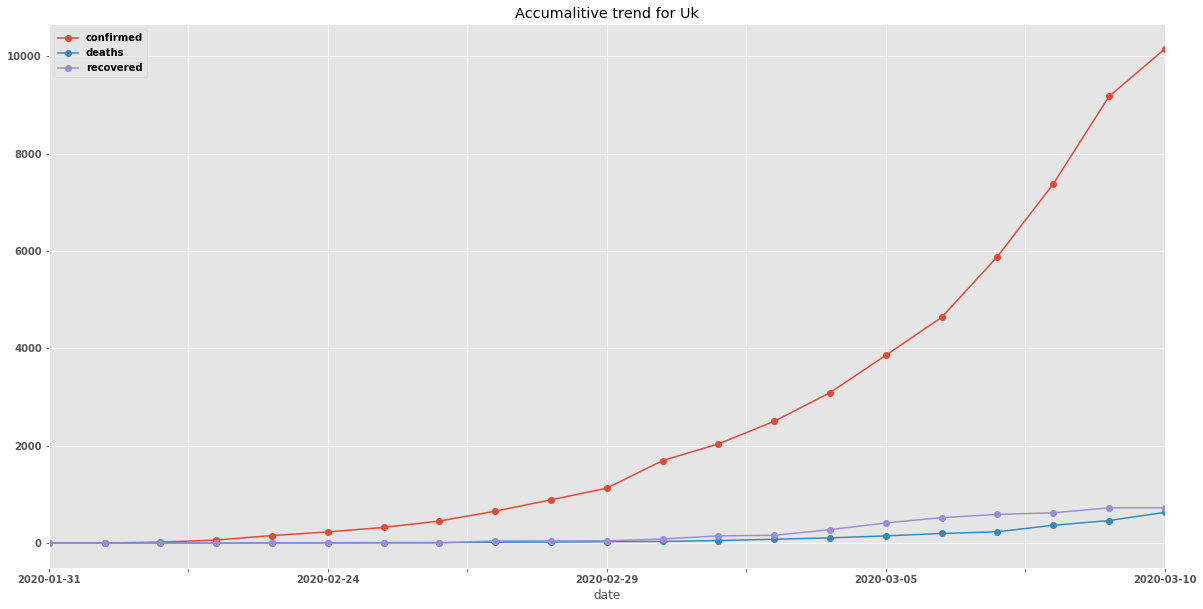

In [183]:
##### Create Graphs #####
    
print('Creating graphs...')
print('... Time Series Trend Line')
# Time Series Data Plots
create_trend_line(agg_df, 'confirmed', 'deaths', 'recovered', 'Accumalitive trend', COUNTRY)


... Daily Figures
... Daily New Infections Differences


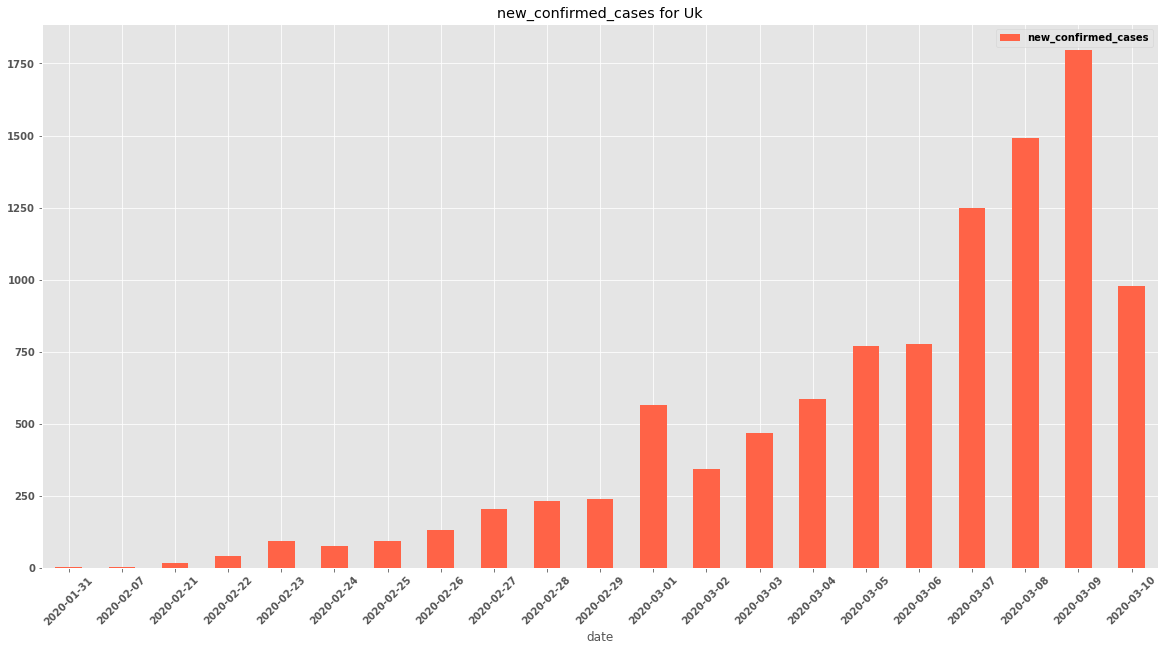

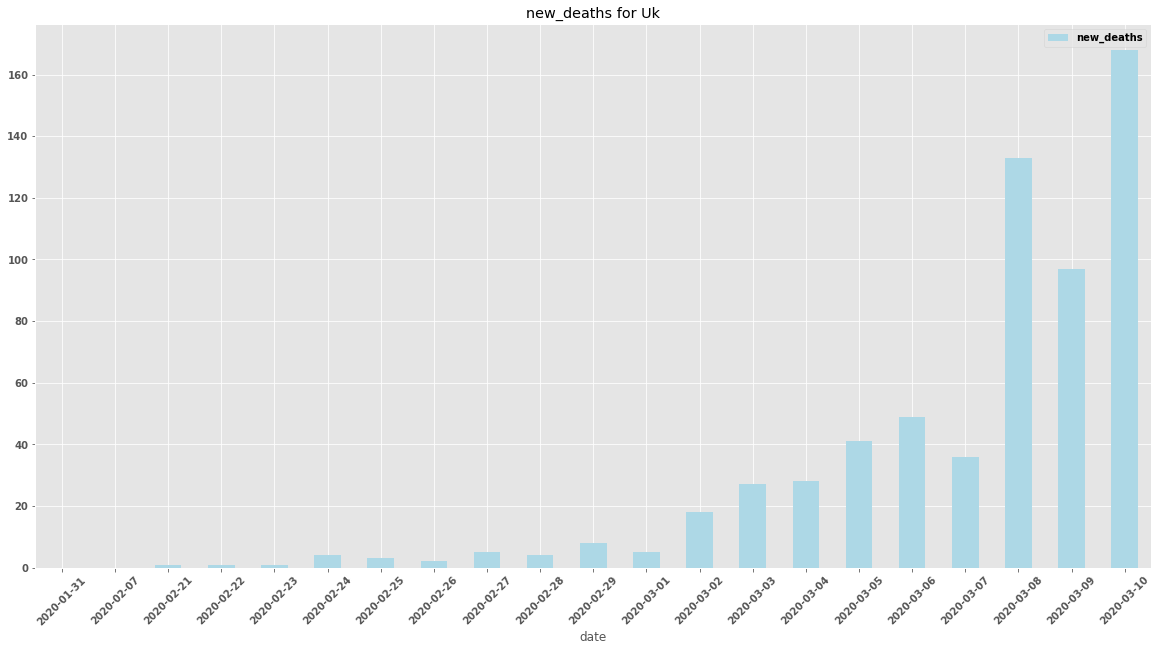

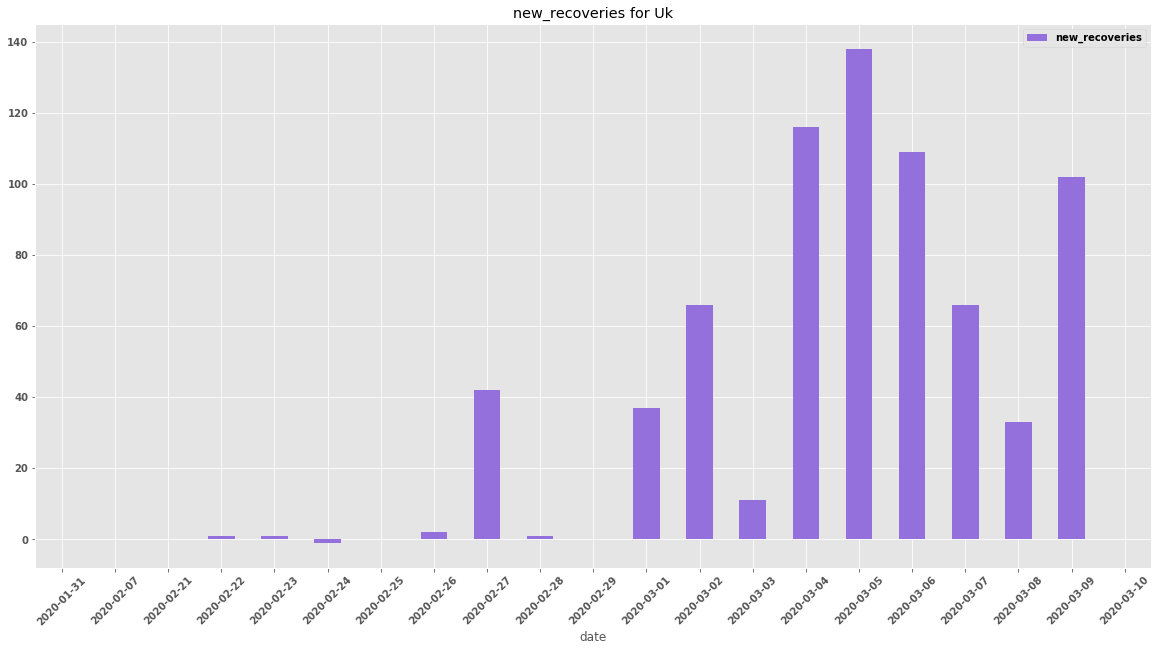

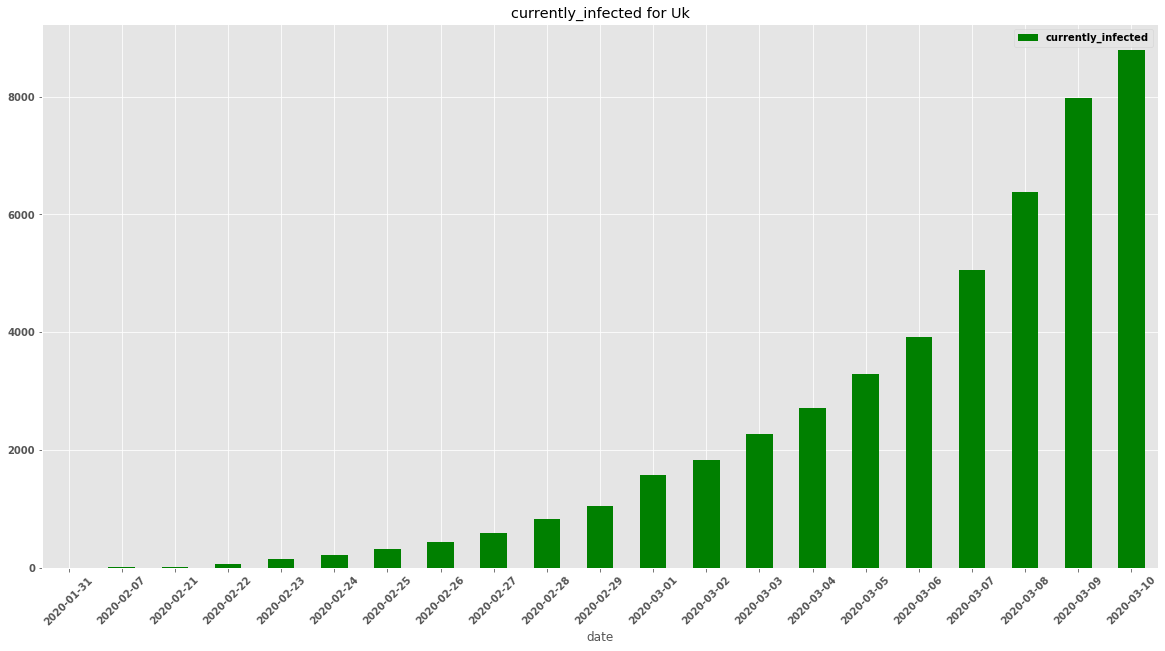

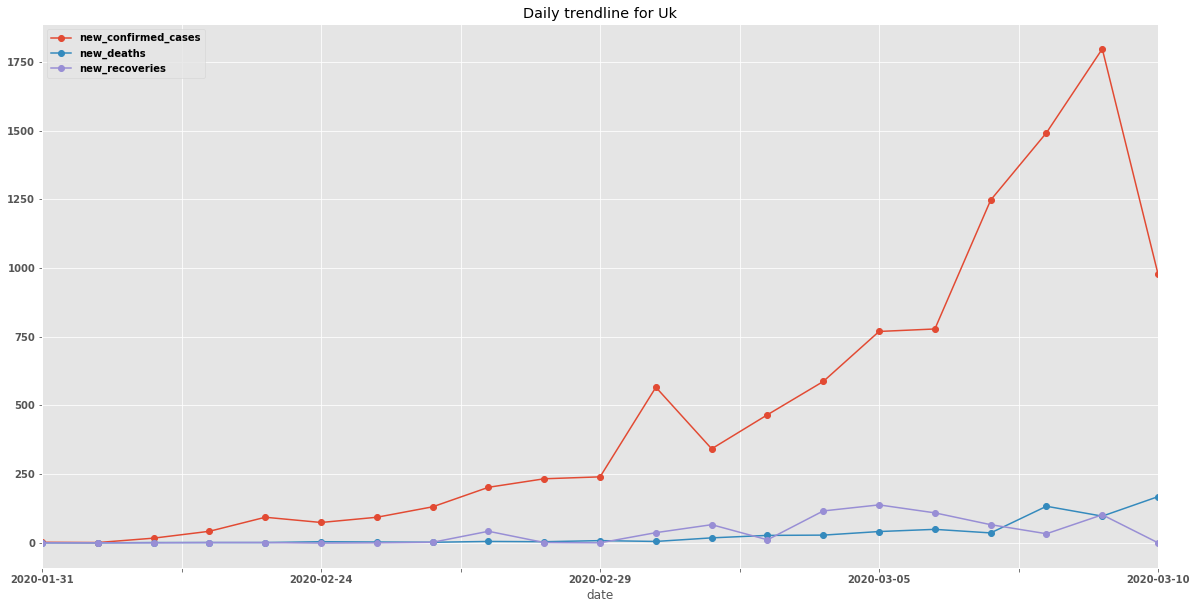

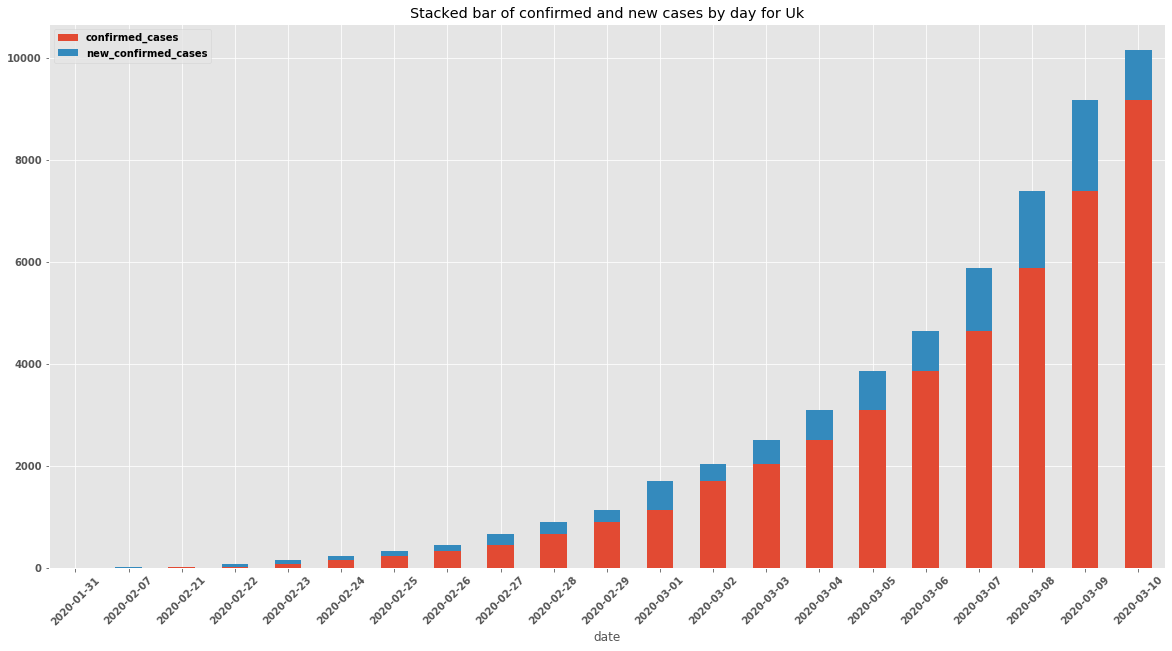

In [184]:

print('... Daily Figures')
# Daily Figures Data Plots
daily_figures_cols = ['new_confirmed_cases', 'new_deaths', 'new_recoveries', 'currently_infected']
for col, rgb in zip(daily_figures_cols, ['tomato', 'lightblue', 'mediumpurple', 'green']):
    create_bar(daily_df, col, rgb, COUNTRY)    
    
# Trend line for new cases
create_trend_line(daily_df, 'new_confirmed_cases', 'new_deaths', 'new_recoveries', 'Daily trendline', COUNTRY)
    
    
print('... Daily New Infections Differences')
new_df = pd.DataFrame([])
new_df['date'] = daily_df['date']
new_df['confirmed_cases'] = agg_df.groupby(['date']).confirmed.sum().values - daily_df.new_confirmed_cases
new_df['new_confirmed_cases'] = daily_df.new_confirmed_cases
create_stacked_bar(new_df, 'new_confirmed_cases', 'confirmed_cases', "Stacked bar of confirmed and new cases by day", COUNTRY)




In [185]:
daily_df

,Unnamed: 0,new_confirmed_cases,new_deaths,new_recoveries,date,confirmed_MA,deaths_MA,recovered_MA,confirmed_exp_MA,deaths_exp_MA,recovered_exp_MA,currently_infected,delta
0,0,2,0,0,2020-01-31,NaN,NaN,NaN,2.000000,0.000000,0.000000,2,0
1,1,1,0,0,2020-02-07,1.5,0.0,0.0,1.250000,0.000000,0.000000,3,0
2,2,17,1,0,2020-02-21,9.0,0.5,0.0,12.153846,0.692308,0.000000,19,-1
3,3,42,1,1,2020-02-22,29.5,1.0,0.5,32.300000,0.900000,0.675000,59,-3
4,4,93,1,1,2020-02-23,67.5,1.0,1.0,72.933884,0.966942,0.892562,150,-5
5,5,74,4,-1,2020-02-24,83.5,2.5,0.0,73.645604,2.991758,-0.370879,221,-8
6,6,93,3,0,2020-02-25,83.5,3.5,-0.5,86.554437,2.997255,-0.123513,311,-11
7,7,131,2,2,2020-02-26,112.0,2.5,1.0,116.189329,2.332317,1.292378,438,-15
8,8,202,5,42,2020-02-27,166.5,3.5,22.0,173.399350,4.110863,28.432172,593,-62
9,9,233,4,1,2020-02-28,217.5,4.5,21.5,213.133789,4.036953,10.143747,821,-67


## REPORTING

In [186]:
import glob


In [187]:
workbook_writer = pd.ExcelWriter(os.path.join(data_dir, report), engine='xlsxwriter')

In [190]:
daily_df.to_excel(workbook_writer, sheet_name='daily_stats')  

workbook = workbook_writer.book



# Get all images for each type
def read_images(path, graph_type):
    image_list = []
    for fn in glob.glob(os.path.join(path, '*_{}.png'.format(graph_type))):
        image_list.append(fn)    
    images = {graph_type : image_list}
    return dict(images)

def get_image_types(path):
    # get all the possible types of images in
    # the passed directory path
    types = []
    for fn in glob.glob(os.path.join(path, '*.png')):
        types.append(fn.split('_',)[-1].split('.')[0])
    
    return types

image_types = get_image_types(image_dir)

In [191]:
image_types

['bar', 'trendline', 'bar', 'bar', 'trendline', 'bar', 'bar']

In [192]:
padding = 1 # Set padding for images in spreadsheet
for types in set(image_types):
    type_dict = read_images(image_dir, types)
    
    # Add image to the worksheet
    worksheet = workbook.add_worksheet(name='{}_graphs'.format(types))
    for image in type_dict[types]:
        worksheet.insert_image('A' +str(padding), image) 
        padding += 50
    padding = 1
    
workbook.close()

In [194]:
for i in type_dict:
    print(i)

trendline


In [195]:
type_dict

{'trendline': ['./images/Uk_new_confirmed_cases_trendline.png',
  './images/Uk_confirmed_trendline.png']}

In [164]:
#     spam_df.to_excel(workbook_writer, sheet_name='spam_email_references')   
workbook.close()


In [146]:
# workbook.